In [2]:
!pip install tensorflow keras==2.13.1

  Using cached keras-2.13.1-py3-none-any.whl.metadata (2.4 kB)
Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0


In [1]:
!pip show tensorflow
!pip show keras

Name: tensorflow
Version: 2.13.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\ghost\anaconda3\envs\prime\lib\site-packages
Requires: tensorflow-intel
Required-by: 
Name: keras
Version: 2.15.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: c:\users\ghost\anaconda3\envs\prime\lib\site-packages
Requires: 
Required-by: tensorflow-intel


# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib inline

In [4]:
from tensorflow.keras.datasets import cifar10

# Splitting training and testing data

In [16]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

Reference:
* 0: airplane

* 1: automobile

* 2: bird

* 3: cat

* 4: deer

* 5: dog

* 6: frog

* 7: horse

* 8: ship

* 9: truck

In [17]:
fig_class=[ "airplane", "automobile","bird","cat","deer", "dog","frog","horse","ship","truck"]

# Describe data

In [18]:
x_train[0].shape
#(32*32 and color scheme is RGB)

(32, 32, 3)

# Visualize

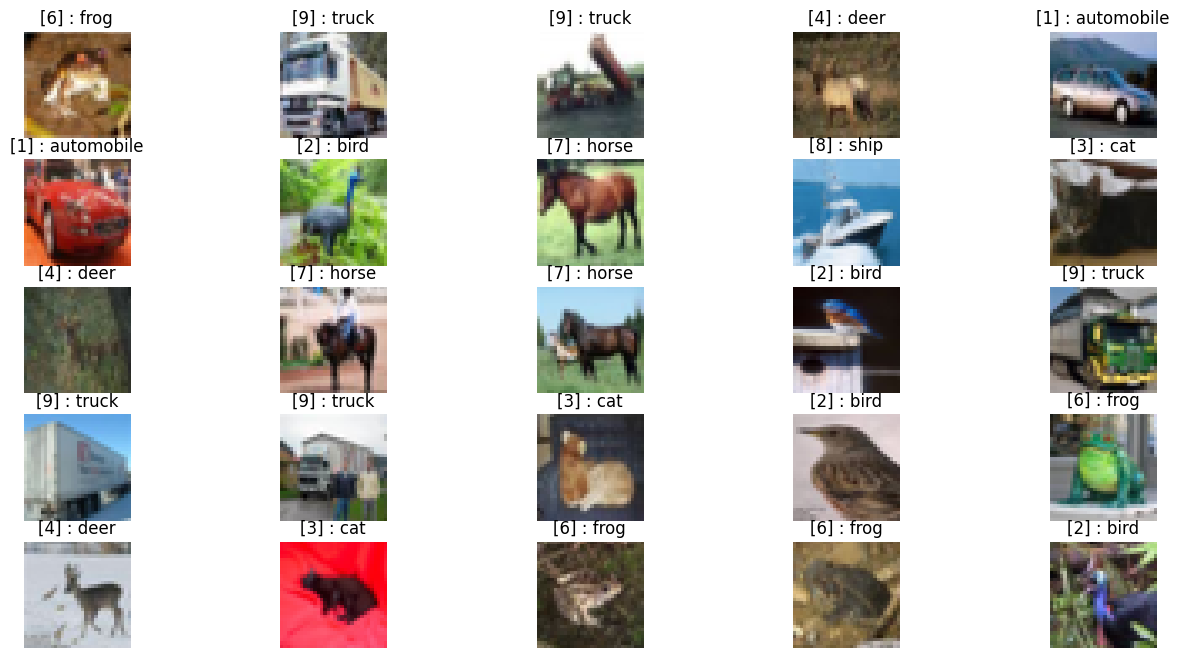

In [19]:
#create figure
fig=plt.figure(figsize=(16,8))

#setting values to rows and columns
rows=5
columns=5

for i in range(25):
    fig.add_subplot(rows,columns,i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
    plt.title(f'{y_train[i]} : {fig_class[int(y_train[i])]}')
    

In [20]:
print(len(x_train))
x_train.shape
#50k worth of train datas

50000


(50000, 32, 32, 3)

In [21]:
print(len(x_test))
x_test.shape
#10k worth of test datas

10000


(10000, 32, 32, 3)

# Maximum value of Pixel

In [22]:
x_train[0].shape

(32, 32, 3)

In [23]:
#Searching for max value of pixel
max=0
for i in range(0,50000):
    max_comp=x_train[i].max()
    if (max < max_comp):
        max=max_comp
print (max)

255


# Normalizing our pixels so that it becomes easier to compute

In [25]:
x_train=x_train/max
x_test=x_test/max

In [27]:
x_train_reshaped = x_train.reshape(x_train.shape[0],32*32*3)
x_test_reshaped = x_test.reshape(x_test.shape[0],32*32*3)

In [32]:
x_train_reshaped.shape

(50000, 3072)

In [33]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [34]:
y_train 

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

# To categorical

In [35]:
from tensorflow.keras.utils import to_categorical
#as we are dealing with multiple classification

In [37]:
y_cat_train=to_categorical(y_train,10)
y_cat_test=to_categorical(y_test,10)

In [38]:
y_cat_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

# Define Model

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [40]:
#Sequential
model=Sequential()

# 3*3 filter decreases our 32*32 size by 2 in each rows and columns making it 30*30
#relu gives max(0,x)
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape = (32,32,3), activation='relu'))

# 3*3 filter again decreases by 2 in each rows and columns making it 28*28
# 2*2 maxpoolsize divides size by 2 making 14*14
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# 5*5 filter now decreases 14*14 data size to 10*10 by decreasing 4 in each rows and columns
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))

# 5*5 filter again decreases 10*10 data size to 6*6 by decreasing 4 in each rows and columns
# 2*2 maxpoolsize thus divides 6*6 rows and column to 3*3
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# flattens multidimension to single dimension
model.add(Flatten())

model.add(Dense(256, activation='relu'))

#Output layer as 10 categories exist
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [41]:
model.summary()
#params=output_size * (input_size + 1)  For dense layers
#params=output_channels * (input_channels * window_size + 1) Fro Convolution layers

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 32)        25632     
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 3, 3, 32)          0         
 g2D)                                                   

# To prevent Overfitting

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
early_stop=EarlyStopping(monitor='val_loss',patience=3)

In [44]:
start_time = time.time()

history = model.fit(x_train,y_cat_train,epochs=5,batch_size=64,
          validation_data=(x_test,y_cat_test),callbacks=[early_stop])


end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

Epoch 1/15
374/782 [=============>................] - ETA: 41s - loss: 1.7673 - accuracy: 0.3432

KeyboardInterrupt: 

# Visualize Results

In [22]:
metrics=pd.DataFrame(model.history.history)

<Axes: >

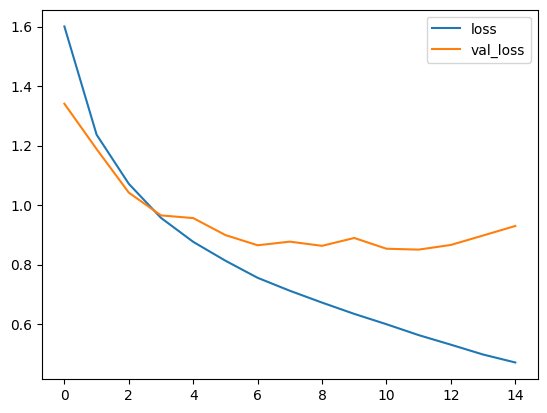

In [23]:
metrics[['loss','val_loss']].plot()

<Axes: >

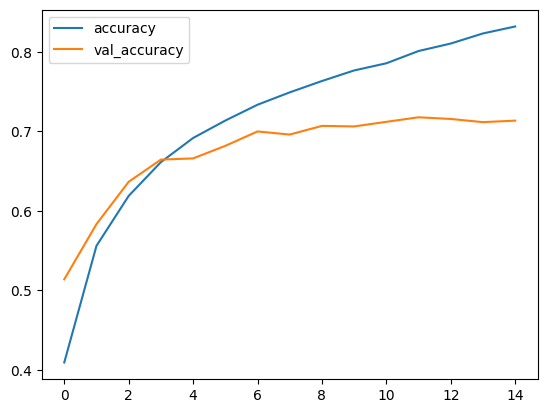

In [24]:
metrics[['accuracy', 'val_accuracy']].plot()

# Evaluate

In [25]:
model.evaluate(x_test,y_cat_test)
prediction = model.predict(x_test)
predictions = [np.argmax(x, axis=0) for x in prediction]


313/313 [==============================] - 3s 10ms/step


# Metrics

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.68      0.75      0.71      1000
           1       0.81      0.86      0.83      1000
           2       0.65      0.58      0.61      1000
           3       0.58      0.43      0.49      1000
           4       0.66      0.69      0.67      1000
           5       0.60      0.64      0.62      1000
           6       0.69      0.85      0.77      1000
           7       0.82      0.71      0.76      1000
           8       0.77      0.86      0.81      1000
           9       0.86      0.76      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



In [28]:
import seaborn as sns

<Axes: >

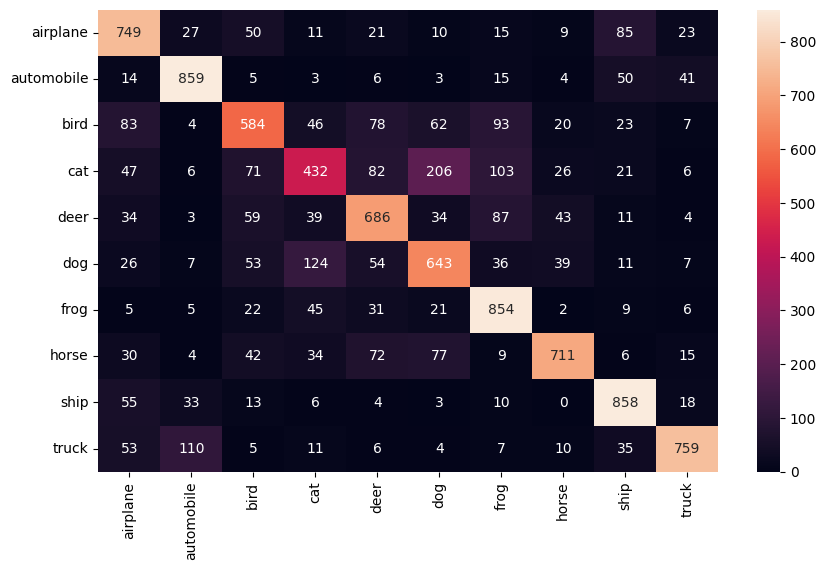

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions),annot=True,fmt='d',xticklabels=fig_class,yticklabels=fig_class)

# Save Model

In [ ]:
model.save('CNN_cfar10_custom_model.h5')

# Save History

In [ ]:
import pickle

with open('history_custom.pkl', 'wb') as f:
    pickle.dump(history.history, f)

# Evaluate on chosen data

In [30]:
import random

CORRECT PREDICTIONS


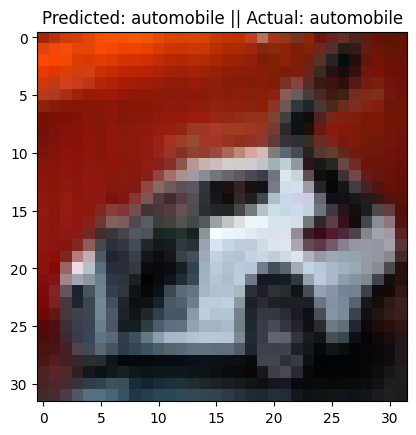

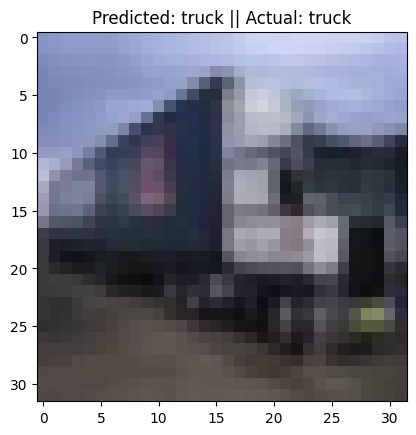

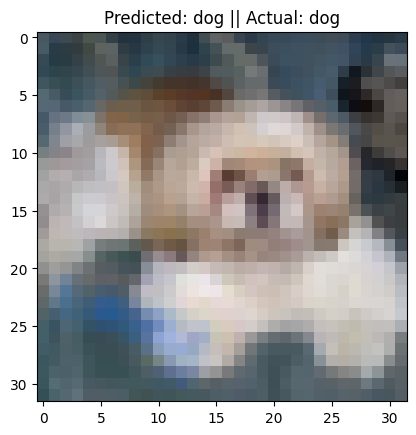

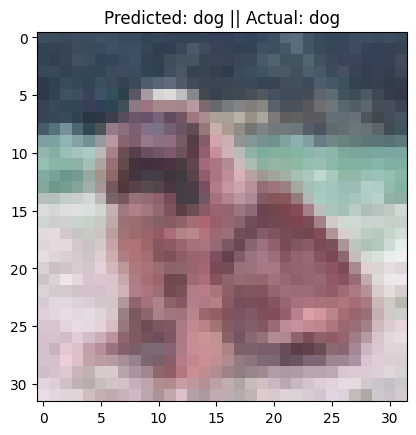

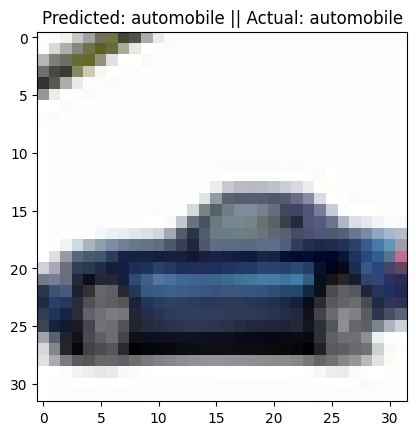

In [31]:
#Lets see which predictions were correct and which were incorrect
count=0
print("CORRECT PREDICTIONS")
#Correct Predictions:
for i in range(0,10000):
    #to randomly check our sample data
    for_random=np.random.binomial(n=1,p=0.1,size=[1])
    
    #our test datas
    test_image=x_test[i].reshape(1,32,32,3)
    #gives back the prediction
    predict_image=model.predict(test_image,verbose=0)
    prediction_value=np.argmax(predict_image,axis=1)
    
    #plotting
    if(int(y_test[i])==prediction_value and for_random):
            plt.title(f"Predicted: {fig_class[int(prediction_value)]} || Actual: {fig_class[int(y_test[i])]}")
            plt.imshow(x_test[i])
            plt.show()
            count+=1
    if count == 5:
        break
            

INCORRECT PREDICTIONS


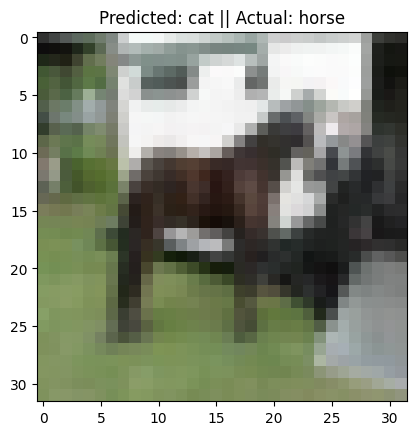

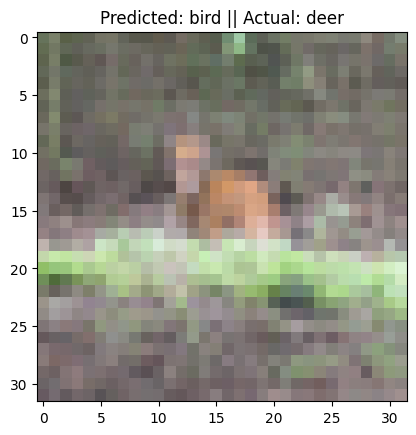

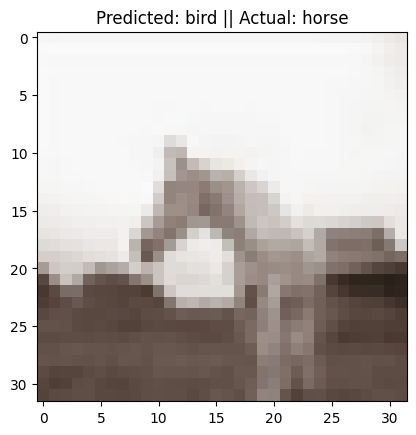

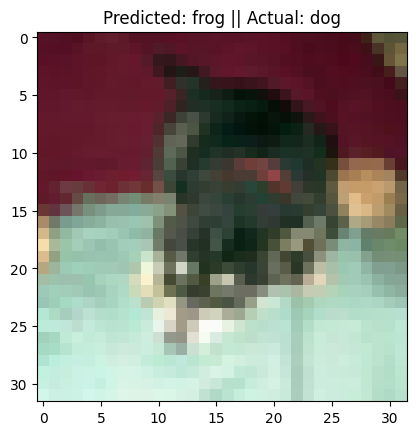

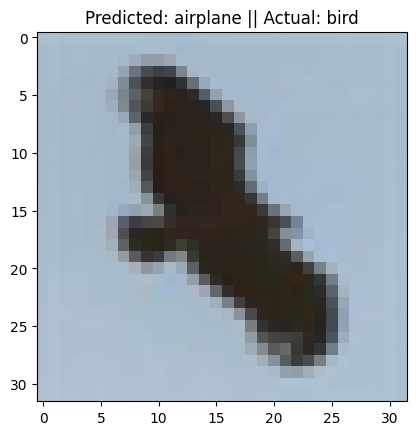

In [32]:
#Lets see which predictions were incorrect 
count=0
print("INCORRECT PREDICTIONS")
#InCorrect Predictions:
for i in range(0,10000):
    #to randomly check our sample data
    for_random=np.random.binomial(n=1,p=0.1,size=[1])
    
    #our test datas
    test_image=x_test[i].reshape(1,32,32,3)
    #gives back the prediction
    predict_image=model.predict(test_image,verbose=0)
    prediction_value=np.argmax(predict_image,axis=1)
    
    #plotting
    if(int(y_test[i])!=prediction_value and for_random):
            plt.title(f"Predicted: {fig_class[int(prediction_value)]} || Actual: {fig_class[int(y_test[i])]}")
            plt.imshow(x_test[i])
            plt.show()
            count+=1
    if count == 5:
        break
            


In [33]:
def predict_classes(image,index):
    #image_resize=image.resize(32,32)
    image_reshape=image.reshape(1,32,32,3)
    predict_image=model.predict(image_reshape,verbose=0)
    prediction_value=int(np.argmax(predict_image,axis=1))
    plt.title(f"Predicted: {fig_class[prediction_value]} || Actual: {fig_class[int(y_test[index])]}")
    plt.imshow(image)
    plt.show()

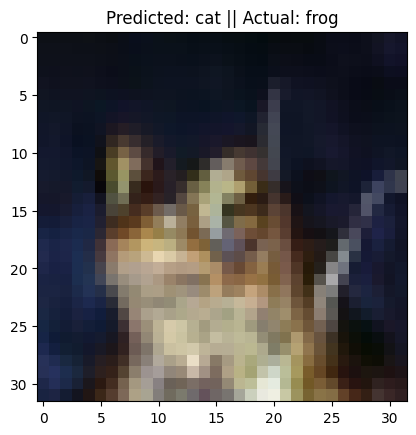

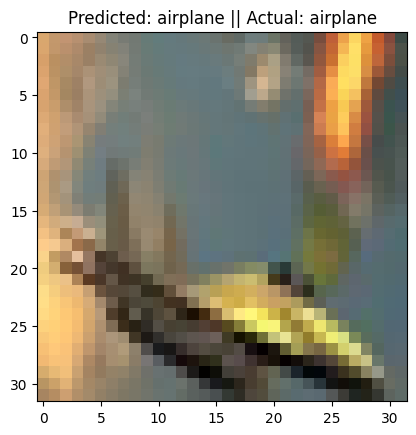

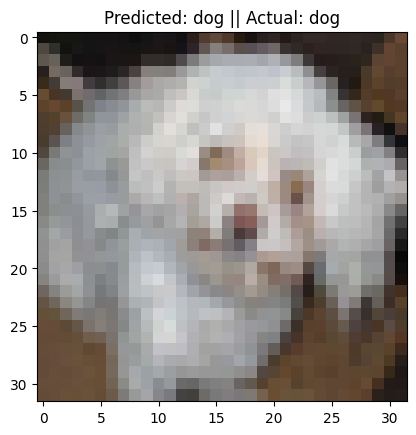

In [34]:
predict_classes(x_test[1034],1034)
predict_classes(x_test[125],125)
predict_classes(x_test[1000],1000)